# Form Classification Model using Y=attrition and choose the best model

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

Read Dataset

In [2]:
import pandas as pd
A = pd.read_csv("F:/Etlhive/HR Attrition Project/HR.csv")

In [3]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#A.isna().sum()

In [6]:
A.corr()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.056652,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.077924,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010577,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,-0.103369,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,-0.006846,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.130016,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


In [7]:
import seaborn as sb

In [8]:
#sb.pairplot(A)

<AxesSubplot:>

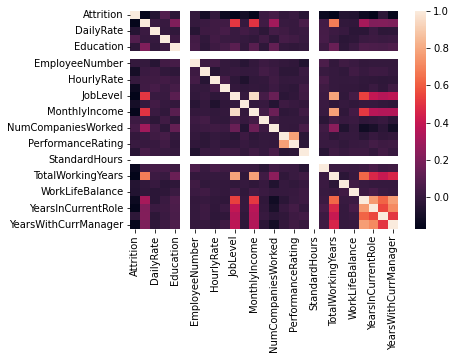

In [9]:
sb.heatmap(A.corr())

In [10]:
Y = A[["Attrition"]]
X = A.drop(labels=["Attrition"],axis=1)

In [11]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [12]:
X[cat].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [13]:
X[con].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [14]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    return round(Q.iloc[0:1,4:5].values[0][0],5)

In [15]:
imp_con_cols = []
for i in con:
    print("========= Attrition vs ",i,"===========")
    x = ANOVA(A,"Attrition",i)
    print(x)
    if(x < 0.05):
        imp_con_cols.append(i)

========= Attrition vs  Age ===========
0.0
========= Attrition vs  DailyRate ===========
0.02986
========= Attrition vs  DistanceFromHome ===========
0.00279
========= Attrition vs  Education ===========
0.22932
========= Attrition vs  EmployeeCount ===========
0.40328
========= Attrition vs  EmployeeNumber ===========
0.68533
========= Attrition vs  EnvironmentSatisfaction ===========
7e-05
========= Attrition vs  HourlyRate ===========
0.79313
========= Attrition vs  JobInvolvement ===========
0.0
========= Attrition vs  JobLevel ===========
0.0
========= Attrition vs  JobSatisfaction ===========
7e-05
========= Attrition vs  MonthlyIncome ===========
0.0
========= Attrition vs  MonthlyRate ===========
0.56112
========= Attrition vs  NumCompaniesWorked ===========
0.09553
========= Attrition vs  PercentSalaryHike ===========
0.60561
========= Attrition vs  PerformanceRating ===========
0.91188
========= Attrition vs  RelationshipSatisfaction ===========
0.07871
========= Attrition v

In [16]:
imp_con_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [17]:
pd.crosstab(A.OverTime,A.Gender)

Gender,Female,Male
OverTime,,
No,408,646
Yes,180,236


In [18]:
A.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [19]:
A.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

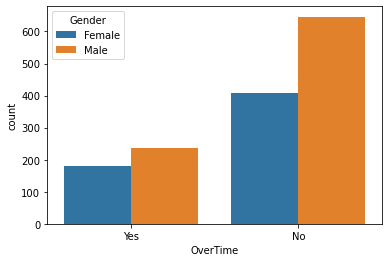

In [20]:
import seaborn as sb
sb.countplot(A.OverTime,hue=A.Gender)

In [21]:
pd.crosstab(A.MaritalStatus,A.Gender)

Gender,Female,Male
MaritalStatus,,
Divorced,117,210
Married,272,401
Single,199,271


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

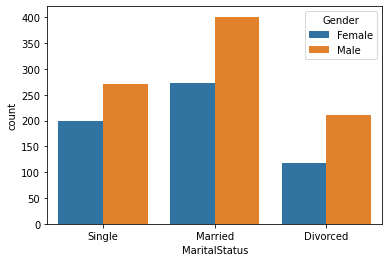

In [22]:
import seaborn as sb
sb.countplot(A.MaritalStatus,hue=A.Gender)

In [23]:
for i in cat:
    print("========= Attrition vs",i, "===========\n")
    print(pd.crosstab(A.Attrition,A[i]))
    print("\n")

========= Attrition vs BusinessTravel ===========

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                      138                208            887
1                       12                 69            156


========= Attrition vs Department ===========

Department  Human Resources  Research & Development  Sales
Attrition                                                 
0                        51                     828    354
1                        12                     133     92


========= Attrition vs EducationField ===========

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
0                            20            517        124      401     71   
1                             7             89         35       63     11   

EducationField  Technical Degree  
Attrition              

In [24]:
pd.crosstab(A.Attrition,A.BusinessTravel)

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,138,208,887
1,12,69,156


<AxesSubplot:xlabel='Attrition', ylabel='count'>

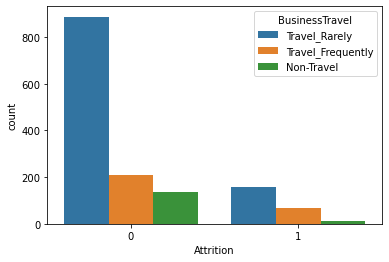

In [25]:
import seaborn as sb
sb.countplot(A.Attrition,hue=A.BusinessTravel)

In [26]:
#cat

In [27]:
#con

In [28]:
from PM8wdnew import catconsep
cat,con = catconsep(A)

In [29]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [30]:
con

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [31]:
from scipy.stats import chi2_contingency
chi = []
pval = []

for i in cat:
    Q = pd.crosstab(A.Attrition,A[i])
    chisq,pvalue,df,contg = chi2_contingency(Q)
    chi.append(chisq)
    pval.append(pvalue)

In [32]:
W = pd.DataFrame([cat,chi]).T
W.columns = ["Cname","Chisq"]
W.sort_values(by=["Chisq"],ascending=False)

,Cname,Chisq
7,OverTime,87.564294
4,JobRole,86.190254
5,MaritalStatus,46.163677
0,BusinessTravel,24.182414
2,EducationField,16.024674
1,Department,10.796007
3,Gender,1.116967
6,Over18,0.0


In [33]:
W = pd.DataFrame([cat,pval]).T
W.columns = ["Cname","Pval"]
W.sort_values(by=["Pval"],ascending=False)

,Cname,Pval
6,Over18,1.0
3,Gender,0.290572
2,EducationField,0.006774
1,Department,0.004526
0,BusinessTravel,0.000006
5,MaritalStatus,0.0
4,JobRole,0.0
7,OverTime,0.0


1.Chisquare->higher the value, stronger the relationship

2.Pvalue->smaller the value, stronger the relationship

In [34]:
imp_con_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

Select categorical feature based on Chisquare test and pvalue

In [35]:
Y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [36]:
imp_con_cols.extend(["OverTime","JobRole","Gender","Over18"])

In [37]:
from PM8wdnew import preprocessing
Xnew = preprocessing(X[imp_con_cols])

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

In [41]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

In [42]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(ytrain,pred_tr),2))
print(round(accuracy_score(ytest,pred_ts),2))

0.87
0.86


In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytrain,pred_tr))
print(confusion_matrix(ytest,pred_ts))

[[967  19]
 [133  57]]
[[239   8]
 [ 32  15]]


In [44]:
pred_tr

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [45]:
pred_ts

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [46]:
model.predict_proba(xtest)

array([[9.54822687e-01, 4.51773135e-02],
       [9.79602143e-01, 2.03978575e-02],
       [9.53514824e-01, 4.64851756e-02],
       [9.16444399e-01, 8.35556007e-02],
       [9.83101043e-01, 1.68989571e-02],
       [9.76295204e-01, 2.37047959e-02],
       [8.85984646e-01, 1.14015354e-01],
       [9.08320032e-01, 9.16799679e-02],
       [7.22569932e-01, 2.77430068e-01],
       [5.76700133e-01, 4.23299867e-01],
       [2.24878498e-01, 7.75121502e-01],
       [9.78515656e-01, 2.14843440e-02],
       [9.18038878e-01, 8.19611218e-02],
       [7.83694553e-01, 2.16305447e-01],
       [7.86785275e-01, 2.13214725e-01],
       [9.38420429e-01, 6.15795705e-02],
       [8.77082765e-01, 1.22917235e-01],
       [8.23637488e-01, 1.76362512e-01],
       [8.85701108e-01, 1.14298892e-01],
       [8.19785003e-01, 1.80214997e-01],
       [8.92137263e-01, 1.07862737e-01],
       [8.65959176e-01, 1.34040824e-01],
       [9.78695071e-01, 2.13049290e-02],
       [9.86072452e-01, 1.39275478e-02],
       [9.452277

In [47]:
model.predict_proba(xtest)[:,1]

array([4.51773135e-02, 2.03978575e-02, 4.64851756e-02, 8.35556007e-02,
       1.68989571e-02, 2.37047959e-02, 1.14015354e-01, 9.16799679e-02,
       2.77430068e-01, 4.23299867e-01, 7.75121502e-01, 2.14843440e-02,
       8.19611218e-02, 2.16305447e-01, 2.13214725e-01, 6.15795705e-02,
       1.22917235e-01, 1.76362512e-01, 1.14298892e-01, 1.80214997e-01,
       1.07862737e-01, 1.34040824e-01, 2.13049290e-02, 1.39275478e-02,
       5.47722086e-02, 8.35794996e-02, 1.27196792e-01, 2.07561388e-01,
       2.91707183e-03, 6.88863752e-02, 2.52172619e-02, 8.20607411e-01,
       1.53314742e-02, 3.00868796e-02, 1.45965564e-01, 4.64185309e-01,
       9.86053903e-02, 4.96930118e-01, 4.78295121e-02, 9.89013271e-02,
       5.07764330e-01, 1.08447320e-01, 5.03612620e-02, 8.45453612e-02,
       4.92393228e-02, 1.76815713e-01, 2.57848720e-02, 1.81265868e-01,
       2.19175540e-01, 1.85760939e-01, 1.99072076e-01, 2.62318105e-01,
       5.68302840e-01, 3.50982726e-01, 2.93631923e-02, 2.00719604e-02,
      

In [48]:
ytrain.Attrition.value_counts()

#Class Imbalance

0    986
1    190
Name: Attrition, dtype: int64

In [49]:
ytest.Attrition.value_counts()

0    247
1     47
Name: Attrition, dtype: int64

In [50]:
Y.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Using Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)

print("Training accuracy:",tr_acc)
print("Testing accuracy",ts_acc)

Training accuracy: 1.0
Testing accuracy 0.82


In [52]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",max_depth=i)
    model = dtc.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)

In [53]:
print("Training accuracy:",tr_acc)
print("Testing accuracy",ts_acc) 

Training accuracy: 1.0
Testing accuracy 0.81


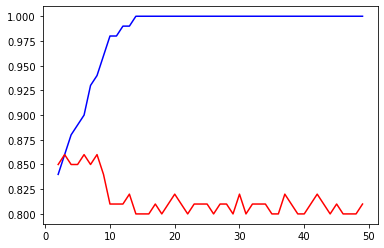

In [54]:
import matplotlib.pyplot as plt
plt.plot(range(2,50,1),tr,c="blue")
plt.plot(range(2,50,1),ts,c="red")

In [55]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    model = dtc.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)

In [56]:
print("Training accuracy:",tr_acc)
print("Testing accuracy",ts_acc) 

Training accuracy: 0.86
Testing accuracy 0.86


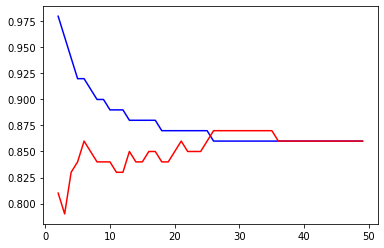

In [57]:
import matplotlib.pyplot as plt
plt.plot(range(2,50,1),tr,c="blue")
plt.plot(range(2,50,1),ts,c="red")

In [58]:
tr = []
ts = []
for i in range(2,100,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",min_samples_split=i)
    model = dtc.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)

In [59]:
print("Training accuracy:",tr_acc)
print("Testing accuracy",ts_acc) 

Training accuracy: 0.86
Testing accuracy 0.86


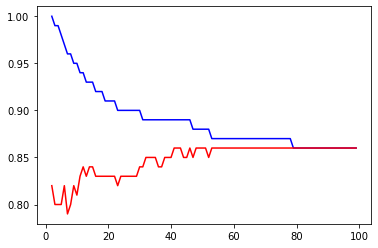

In [60]:
import matplotlib.pyplot as plt
plt.plot(range(2,100,1),tr,c="blue")
plt.plot(range(2,100,1),ts,c="red")

Using Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21)
model = rfc.fit(xtrain,ytrain)
pred_tr= model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)

In [62]:
print("Training accuracy",tr_acc)
print("Testing accuracy",ts_acc)

Training accuracy 1.0
Testing accuracy 0.88


In [63]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr= model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)

In [64]:
print("Training accuracy",tr_acc)
print("Testing accuracy",ts_acc)

Training accuracy 1.0
Testing accuracy 0.88


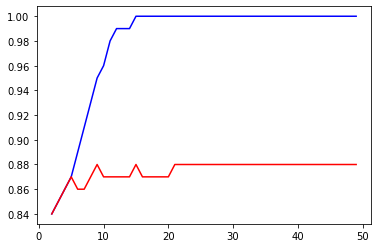

In [65]:
import matplotlib.pyplot as plt
plt.plot(range(2,50,1),tr,c="blue")
plt.plot(range(2,50,1),ts,c="red")

In [66]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_split=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr= model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)

In [67]:
print("Training accuracy",tr_acc)
print("Testing accuracy",ts_acc)

Training accuracy 0.86
Testing accuracy 0.86


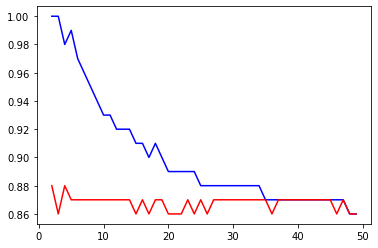

In [68]:
import matplotlib.pyplot as plt
plt.plot(range(2,50,1),tr,c="blue")
plt.plot(range(2,50,1),ts,c="red")

In [69]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_leaf=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr= model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)

In [70]:
print("Training accuracy",tr_acc)
print("Testing accuracy",ts_acc)

Training accuracy 0.84
Testing accuracy 0.84


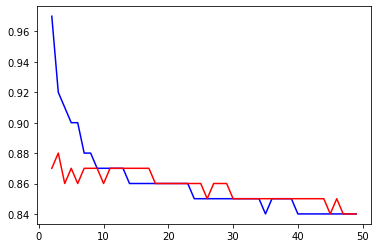

In [71]:
import matplotlib.pyplot as plt
plt.plot(range(2,50,1),tr,c="blue")
plt.plot(range(2,50,1),ts,c="red")

Using AdaBoost

In [72]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.ensemble import AdaBoostClassifier
    abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=i),n_estimators=30)
    model = abc.fit(xtrain,ytrain)
    pred_tr= model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)

In [73]:
print("Training accuracy",tr_acc)
print("Testing accuracy",ts_acc)

Training accuracy 1.0
Testing accuracy 0.8


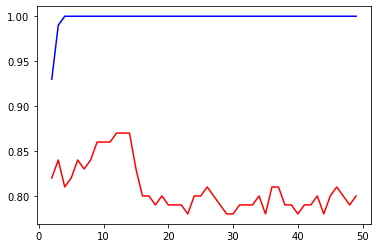

In [74]:
import matplotlib.pyplot as plt
plt.plot(range(2,50,1),tr,c="blue")
plt.plot(range(2,50,1),ts,c="red")

In [75]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_split=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr= model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)

In [76]:
print("Training accuracy",tr_acc)
print("Testing accuracy",ts_acc)

Training accuracy 0.86
Testing accuracy 0.86


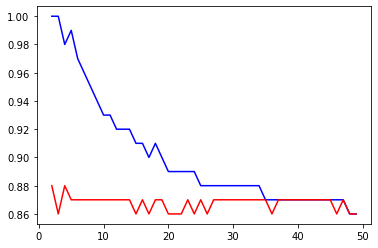

In [77]:
import matplotlib.pyplot as plt
plt.plot(range(2,50,1),tr,c="blue")
plt.plot(range(2,50,1),ts,c="red")

# Create Regression Model

In [78]:
from warnings import filterwarnings
filterwarnings("ignore")

Reading Dataset

In [79]:
import pandas as pd
A = pd.read_csv("F:/Etlhive/HR Attrition Project/HR.csv")

In [80]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Missing Data Treatment

In [81]:
A.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [82]:
A.isna()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
        x = A[i].mode()[0]
        A[i] = A[i].fillna(x)
    else:
        con.append(i)
        x = round(A[i].mean(),2)
        A[i] = A[i].fillna(x)

In [84]:
Y = A[['MonthlyRate']]
X = A.drop(labels=["MonthlyRate"],axis=1)

In [85]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [86]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [87]:
con

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [88]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [89]:
outliers = []
for i in X1.columns:
    outliers.extend(list(X1[(X1[i]>3) | (X1[i]<-3)].index))

In [90]:
import numpy as np
outliers = np.unique(outliers)

In [91]:
X = X.drop(index=outliers,axis=0)
Y = Y.drop(index=outliers,axis=0)

In [92]:
X.shape

(1387, 34)

In [93]:
Y.shape

(1387, 1)

In [94]:
X.index = range(0,1387,1)
Y.index = range(0,1387,1)

EDA

In [95]:
for i in cat:
    import pandas as pd
    from statsmodels.formula.api import ols
    rel = "MonthlyRate ~ " + str(i)
    model = ols(rel,A).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    print(rel,"--->  ",round(anova_results.iloc[0,4],4))

MonthlyRate ~ BusinessTravel --->   0.8376
MonthlyRate ~ Department --->   0.5697
MonthlyRate ~ EducationField --->   0.7529
MonthlyRate ~ Gender --->   0.1119
MonthlyRate ~ JobRole --->   0.779
MonthlyRate ~ MaritalStatus --->   0.3097
MonthlyRate ~ Over18 --->   nan
MonthlyRate ~ OverTime --->   0.4116


In [96]:
cat.remove("BusinessTravel")

In [97]:
cat.remove("Department")

In [98]:
cat.remove("EducationField")

In [99]:
cat.remove("Gender")

In [100]:
cat.remove("JobRole")

In [101]:
cat.remove("MaritalStatus")

In [102]:
cat.remove("OverTime")

In [103]:
cat.remove("Over18")

In [104]:
A.corr()["MonthlyRate"].sort_values()

YearsWithCurrManager       -0.036746
StockOptionLevel           -0.034323
DailyRate                  -0.032182
Education                  -0.026084
YearsAtCompany             -0.023655
JobInvolvement             -0.016322
HourlyRate                 -0.015297
YearsInCurrentRole         -0.012815
PerformanceRating          -0.009811
PercentSalaryHike          -0.006429
RelationshipSatisfaction   -0.004085
JobSatisfaction             0.000644
TrainingTimesLastYear       0.001467
YearsSinceLastPromotion     0.001567
WorkLifeBalance             0.007963
EmployeeNumber              0.012648
Attrition                   0.015170
NumCompaniesWorked          0.017521
TotalWorkingYears           0.026442
DistanceFromHome            0.027473
Age                         0.028051
MonthlyIncome               0.034814
EnvironmentSatisfaction     0.037600
JobLevel                    0.039563
MonthlyRate                 1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

In [105]:
con.remove("EmployeeCount")

In [106]:
con.remove("StandardHours")

In [107]:
A.corr()["MonthlyRate"].sort_values()

YearsWithCurrManager       -0.036746
StockOptionLevel           -0.034323
DailyRate                  -0.032182
Education                  -0.026084
YearsAtCompany             -0.023655
JobInvolvement             -0.016322
HourlyRate                 -0.015297
YearsInCurrentRole         -0.012815
PerformanceRating          -0.009811
PercentSalaryHike          -0.006429
RelationshipSatisfaction   -0.004085
JobSatisfaction             0.000644
TrainingTimesLastYear       0.001467
YearsSinceLastPromotion     0.001567
WorkLifeBalance             0.007963
EmployeeNumber              0.012648
Attrition                   0.015170
NumCompaniesWorked          0.017521
TotalWorkingYears           0.026442
DistanceFromHome            0.027473
Age                         0.028051
MonthlyIncome               0.034814
EnvironmentSatisfaction     0.037600
JobLevel                    0.039563
MonthlyRate                 1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

In [108]:
A.corr()["MonthlyRate"].sort_values().index[0:11]

Index(['YearsWithCurrManager', 'StockOptionLevel', 'DailyRate', 'Education',
       'YearsAtCompany', 'JobInvolvement', 'HourlyRate', 'YearsInCurrentRole',
       'PerformanceRating', 'PercentSalaryHike', 'RelationshipSatisfaction'],
      dtype='object')

In [109]:
u = ['YearsWithCurrManager', 'StockOptionLevel', 'DailyRate', 'Education',
       'YearsAtCompany', 'JobInvolvement', 'HourlyRate', 'YearsInCurrentRole',
       'PerformanceRating', 'PercentSalaryHike', 'RelationshipSatisfaction']

for i in u:
    con.remove(i)

Preprocessing

In [110]:
cat

[]

In [111]:
con

['Attrition',
 'Age',
 'DistanceFromHome',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsSinceLastPromotion']

Model 1

In [112]:
Y = A[["MonthlyRate"]]
X = A[["JobLevel"]]

#cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
#X2 = pd.get_dummies(X[cat])
#Xnew = X1.join(X2)
#Xnew

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),3)

0.004

Model 2

In [113]:
Y = A[["MonthlyRate"]]
X = A[["JobLevel","MonthlyIncome"]]

#cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
#X2 = pd.get_dummies(X[cat])
#Xnew = X1.join(X2)
#Xnew

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),3)

0.004

Model 3

In [114]:
Y = A[["MonthlyRate"]]
X = A[["JobLevel","MonthlyIncome","EmployeeNumber"]]

#cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
#X2 = pd.get_dummies(X[cat])
#Xnew = X1.join(X2)
#Xnew

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),3)

0.005

Model 4

In [115]:
Y = A[["MonthlyRate"]]
X = A[["JobLevel","MonthlyIncome","EmployeeNumber","TrainingTimesLastYear"]]

#cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
#X2 = pd.get_dummies(X[cat])
#Xnew = X1.join(X2)
#Xnew

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),3)

0.005

Model 5

In [116]:
Y = A[["MonthlyRate"]]
X = A[["JobLevel","MonthlyIncome","EmployeeNumber","TrainingTimesLastYear","JobSatisfaction"]]

#cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
#X2 = pd.get_dummies(X[cat])
#Xnew = X1.join(X2)
#Xnew

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),3)

0.005

Model 6

In [117]:
Y = A[["MonthlyRate"]]
X = A[["JobLevel","MonthlyIncome","EmployeeNumber","TrainingTimesLastYear","JobSatisfaction","StockOptionLevel"]]

#cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
#X2 = pd.get_dummies(X[cat])
#Xnew = X1.join(X2)
#Xnew

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),3)

0.007

Model 7

In [118]:
Y = A[["MonthlyRate"]]
X = A[["JobLevel","MonthlyIncome","EmployeeNumber","TrainingTimesLastYear","JobSatisfaction","StockOptionLevel","DailyRate"]]

#cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
#X2 = pd.get_dummies(X[cat])
#Xnew = X1.join(X2)
#Xnew

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),3)

0.007

Model 8

In [119]:
Y = A[["MonthlyRate"]]
X = A[["JobLevel","MonthlyIncome","EmployeeNumber","TrainingTimesLastYear","JobSatisfaction","StockOptionLevel","DailyRate","Education"]]

#cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
#X2 = pd.get_dummies(X[cat])
#Xnew = X1.join(X2)
#Xnew

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),3)

0.008

Check for Error

In [120]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)

In [121]:
tr_err

50199656.32

In [122]:
ts_err

51557040.75

K Mean Clustering

In [123]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Which columns should be used for clustering

In [124]:
B = A[["Department","EducationField","Gender","JobInvolvement","JobLevel"]]

Standardize

In [125]:
from PM8wdnew import preprocessing
Bnew = preprocessing(B)

Clusters

In [126]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(Bnew)

In [127]:
model.labels_

array([3, 1, 1, ..., 0, 1, 0])

In [128]:
Bnew['Cluster_no']=model.labels_

In [129]:
Bnew['JobRole']=A.JobRole

In [130]:
Bnew.sort_values(by="Cluster_no").head(3)

,JobInvolvement,JobLevel,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,Cluster_no,JobRole
1469,1.785511,-0.057788,0,1,0,0,0,0,1,0,0,0,1,0,Laboratory Technician
1053,1.785511,-0.057788,0,1,0,0,1,0,0,0,0,0,1,0,Research Scientist
1052,0.379672,-0.961486,0,1,0,0,0,0,0,0,1,0,1,0,Research Scientist


Find similar Job role for a given Job role

In [131]:
w = input("Enter the Job role: ")
cluster_no_on_input_role = Bnew[Bnew.JobRole==w].Cluster_no.values[0]
similar_role = list(Bnew[(Bnew['Cluster_no'] == cluster_no_on_input_role) & (Bnew.JobRole != w)].JobRole.values)

Enter the Job role: Laboratory Technician


In [132]:
similar_role

['Research Scientist',
 'Manufacturing Director',
 'Sales Representative',
 'Research Scientist',
 'Healthcare Representative',
 'Sales Representative',
 'Research Scientist',
 'Healthcare Representative',
 'Sales Executive',
 'Manufacturing Director',
 'Manufacturing Director',
 'Research Scientist',
 'Sales Executive',
 'Sales Executive',
 'Research Scientist',
 'Research Scientist',
 'Manufacturing Director',
 'Healthcare Representative',
 'Sales Executive',
 'Sales Executive',
 'Healthcare Representative',
 'Healthcare Representative',
 'Sales Executive',
 'Research Scientist',
 'Healthcare Representative',
 'Research Scientist',
 'Manager',
 'Research Scientist',
 'Sales Executive',
 'Research Scientist',
 'Sales Executive',
 'Manufacturing Director',
 'Sales Executive',
 'Sales Executive',
 'Sales Executive',
 'Manufacturing Director',
 'Research Scientist',
 'Sales Executive',
 'Research Scientist',
 'Sales Executive',
 'Sales Representative',
 'Manufacturing Director',
 'Manufa

In [133]:
Bnew

,JobInvolvement,JobLevel,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,Cluster_no,JobRole
0,0.379672,-0.057788,0,0,1,0,1,0,0,0,0,1,0,3,Sales Executive
1,-1.026167,-0.057788,0,1,0,0,1,0,0,0,0,0,1,1,Research Scientist
2,-1.026167,-0.961486,0,1,0,0,0,0,0,1,0,0,1,1,Laboratory Technician
3,0.379672,-0.961486,0,1,0,0,1,0,0,0,0,1,0,0,Research Scientist
4,0.379672,-0.961486,0,1,0,0,0,0,1,0,0,0,1,0,Laboratory Technician
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.785511,-0.057788,0,1,0,0,0,0,1,0,0,0,1,0,Laboratory Technician
1466,-1.026167,0.845911,0,1,0,0,0,0,1,0,0,0,1,1,Healthcare Representative
1467,1.785511,-0.057788,0,1,0,0,1,0,0,0,0,0,1,0,Manufacturing Director
1468,-1.026167,-0.057788,0,0,1,0,0,0,1,0,0,0,1,1,Sales Executive
